<a href="https://colab.research.google.com/github/Mag1cznyWojtek/test/blob/master/Kopia_notatnika_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Łączenie dataset'ów

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn.decomposition import PCA
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.pipeline import make_pipeline


dataframe1 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset/l2-benign.csv")
dataframe2 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset/l2-malicious.csv")

dataframe = pd.concat([dataframe1, dataframe2])

dataframe.head(10)

,SourceIP,DestinationIP,SourcePort,DestinationPort,TimeStamp,Duration,FlowBytesSent,FlowSentRate,FlowBytesReceived,FlowReceivedRate,...,PacketTimeCoefficientofVariation,ResponseTimeTimeVariance,ResponseTimeTimeStandardDeviation,ResponseTimeTimeMean,ResponseTimeTimeMedian,ResponseTimeTimeMode,ResponseTimeTimeSkewFromMedian,ResponseTimeTimeSkewFromMode,ResponseTimeTimeCoefficientofVariation,Label
0,192.168.20.191,176.103.130.131,50749,443,2020-01-14 15:49:11,95.081550,62311,655.342703,65358,687.388878,...,0.574626,0.001053,0.032457,0.027624,0.026854,0.026822,0.071187,0.024715,1.174948,Benign
1,192.168.20.191,176.103.130.131,50749,443,2020-01-14 15:50:52,122.309318,93828,767.136973,101232,827.672018,...,0.509047,0.001170,0.034200,0.024387,0.021043,0.026981,0.293297,-0.075845,1.402382,Benign
2,192.168.20.191,176.103.130.131,50749,443,2020-01-14 15:52:55,120.958413,38784,320.639127,38236,316.108645,...,0.732636,0.000785,0.028021,0.029238,0.026922,0.026855,0.248064,0.085061,0.958348,Benign
3,192.168.20.191,176.103.130.131,50749,443,2020-01-14 15:54:56,110.501080,61993,561.017141,69757,631.278898,...,0.646859,0.000411,0.020274,0.019925,0.019268,0.026918,0.097199,-0.344926,1.017535,Benign
4,176.103.130.131,192.168.20.191,443,50749,2020-01-14 15:56:46,54.229891,83641,1542.341289,76804,1416.266907,...,0.507334,0.079079,0.281209,0.025930,0.000046,0.000021,0.276133,0.092135,10.844829,Benign
5,192.168.20.191,176.103.130.131,52491,443,2020-01-14 15:57:40,145.460721,54084,371.811714,63843,438.901991,...,0.736075,0.000643,0.025358,0.025075,0.026813,0.026903,-0.205614,-0.072087,1.011300,Benign
6,192.168.20.191,176.103.130.131,52742,443,2020-01-14 15:59:18,0.155410,1718,11054.629689,7411,47686.764043,...,0.479104,0.000155,0.012445,0.013211,0.010833,0.000023,0.573131,1.059653,0.942062,Benign
7,192.168.20.191,176.103.130.131,52742,443,2020-01-14 16:00:03,0.027001,55,2036.961594,66,2444.353913,...,1.000000,0.000000,0.000000,0.027001,0.027001,0.027001,-10.000000,-10.000000,0.000000,Benign
8,192.168.20.191,176.103.130.131,52491,443,2020-01-14 16:00:06,44.649554,32285,723.075532,36193,810.601602,...,0.598884,0.000664,0.025772,0.021313,0.020786,0.000203,0.061237,0.819086,1.209244,Benign
9,192.168.20.191,176.103.130.131,52742,443,2020-01-14 16:00:48,0.046455,55,1183.941449,66,1420.729738,...,1.000000,0.000000,0.000000,0.046455,0.046455,0.046455,-10.000000,-10.000000,0.000000,Benign


# Czy dane są zbalansowane?

In [3]:
dataframe['Label'].value_counts()

Malicious    249836
Benign        19807
Name: Label, dtype: int64

<Axes: xlabel='Label', ylabel='count'>

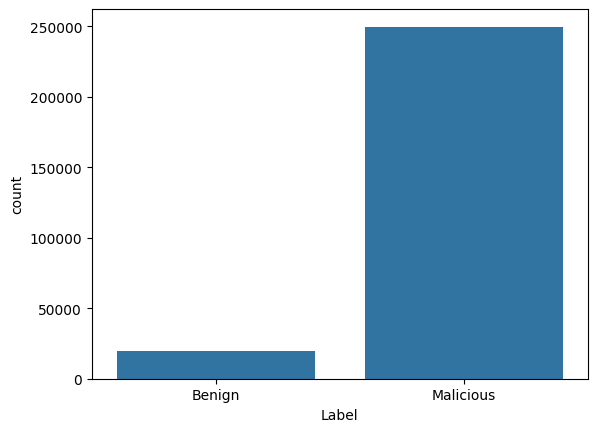

In [4]:
import seaborn as sns
sns.countplot(x='Label', data = dataframe)

# Wykres rozrzutu
Relacja między czasem trwania, a długością pakietu

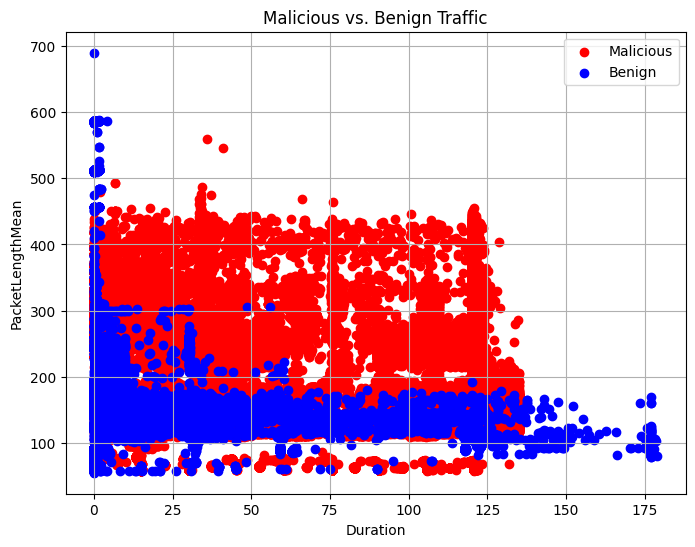

In [5]:
malicious_data = dataframe[dataframe['Label'] == 'Malicious']
benign_data = dataframe[dataframe['Label'] == 'Benign']

# Plotting
plt.figure(figsize=(8, 6))

# Scatter plot for malicious traffic
plt.scatter(malicious_data['Duration'], malicious_data['PacketLengthMean'], color='red', label='Malicious')

# Scatter plot for benign traffic
plt.scatter(benign_data['Duration'], benign_data['PacketLengthMean'], color='blue', label='Benign')

# Set labels and title
plt.xlabel('Duration')
plt.ylabel('PacketLengthMean')
plt.title('Malicious vs. Benign Traffic')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

Relacja między bajtami otrzymanymi, wysłanymi

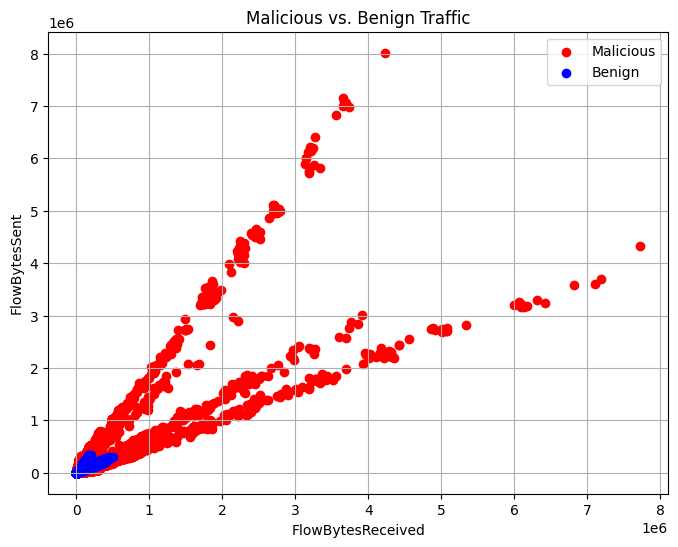

In [6]:
malicious_data = dataframe[dataframe['Label'] == 'Malicious']
benign_data = dataframe[dataframe['Label'] == 'Benign']

# Plotting
plt.figure(figsize=(8, 6))

# Scatter plot for malicious traffic
plt.scatter(malicious_data['FlowBytesReceived'], malicious_data['FlowBytesSent'], color='red', label='Malicious')

# Scatter plot for benign traffic
plt.scatter(benign_data['FlowBytesReceived'], benign_data['FlowBytesSent'], color='blue', label='Benign')

# Set labels and title
plt.xlabel('FlowBytesReceived')
plt.ylabel('FlowBytesSent')
plt.title('Malicious vs. Benign Traffic')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

## Sprawdzenie czy są wartości null

In [7]:
null = dataframe.isnull()
print(dataframe.isnull().any().any())
print(null.sum())

True
SourceIP                                    0
DestinationIP                               0
SourcePort                                  0
DestinationPort                             0
TimeStamp                                   0
Duration                                    0
FlowBytesSent                               0
FlowSentRate                                0
FlowBytesReceived                           0
FlowReceivedRate                            0
PacketLengthVariance                        0
PacketLengthStandardDeviation               0
PacketLengthMean                            0
PacketLengthMedian                          0
PacketLengthMode                            0
PacketLengthSkewFromMedian                  0
PacketLengthSkewFromMode                    0
PacketLengthCoefficientofVariation          0
PacketTimeVariance                          0
PacketTimeStandardDeviation                 0
PacketTimeMean                              0
PacketTimeMedian             

## Zmiana wartości null na 0

In [8]:
dataframe['ResponseTimeTimeMedian'] = dataframe['ResponseTimeTimeMedian'].fillna(0)
dataframe['ResponseTimeTimeSkewFromMedian'] = dataframe['ResponseTimeTimeSkewFromMedian'].fillna(0)
null = dataframe.isnull()
print("New: ", dataframe.isnull().any().any())
#print("New: ", null.sum())

New:  False


# Usnięcie wartości Na i duplikatów

In [9]:
dataframe = dataframe.dropna()
dataframe = dataframe.drop_duplicates()
dataframe.shape

(269643, 35)

# Zbalansowanie danych

Zastosowano upsampling dla złego ruchu

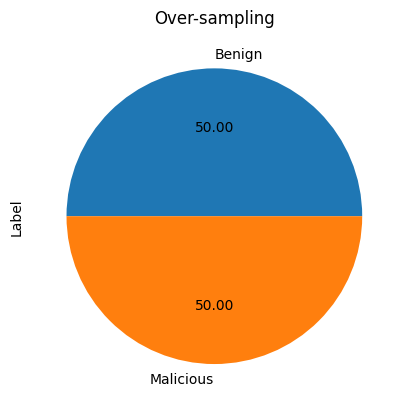

In [10]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy=1)

X = dataframe.drop('Label',axis=1)
y = dataframe['Label']
X_ros, y_ros = ros.fit_resample(X, y)

ax = y_ros.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

In [11]:
dataframe = X_ros.merge(y_ros, left_index=True, right_index=True)
dataframe.shape

(499672, 35)

# Usuwanie nieistotnych cech

In [12]:
dataframe = dataframe.drop(labels = ['TimeStamp','SourceIP','DestinationIP','SourcePort','DestinationPort'], axis = 1)
dataframe.describe()

,Duration,FlowBytesSent,FlowSentRate,FlowBytesReceived,FlowReceivedRate,PacketLengthVariance,PacketLengthStandardDeviation,PacketLengthMean,PacketLengthMedian,PacketLengthMode,...,PacketTimeSkewFromMode,PacketTimeCoefficientofVariation,ResponseTimeTimeVariance,ResponseTimeTimeStandardDeviation,ResponseTimeTimeMean,ResponseTimeTimeMedian,ResponseTimeTimeMode,ResponseTimeTimeSkewFromMedian,ResponseTimeTimeSkewFromMode,ResponseTimeTimeCoefficientofVariation
count,499672.000000,4.996720e+05,4.996720e+05,4.996720e+05,4.996720e+05,4.996720e+05,499672.000000,499672.000000,499672.000000,499672.000000,...,499672.000000,499672.000000,499672.000000,499672.000000,499672.000000,499672.000000,499672.000000,499672.000000,499672.000000,499672.000000
mean,44.138297,4.009496e+04,4.701234e+04,4.237065e+04,3.139090e+04,9.244297e+04,219.748821,172.985227,95.436359,70.795376,...,1.229215,0.969741,1.756115,0.321924,0.441349,0.394198,0.203530,-0.963600,-0.058256,1.118729
std,50.907330,1.438731e+05,4.211725e+05,1.392773e+05,2.560370e+05,1.534184e+05,210.127381,85.576479,33.068879,15.385245,...,0.864144,0.529855,11.938866,1.287111,2.076773,2.350066,1.724775,3.171116,3.199033,1.761592
min,0.000000,5.500000e+01,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000,55.000000,54.000000,54.000000,...,-10.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,-10.000000,-10.000000,0.000000
25%,0.910892,6.180000e+02,5.405876e+01,4.760000e+02,1.417684e+02,4.692099e+02,21.661253,92.000000,76.000000,66.000000,...,0.627914,0.577354,0.000016,0.004041,0.010486,0.011950,0.000015,-1.837869,0.380995,0.542984
50%,33.336338,1.807000e+03,3.581126e+02,4.827000e+03,4.462837e+02,1.827574e+04,135.187782,152.539984,87.000000,68.000000,...,1.224947,0.745412,0.000075,0.008654,0.015084,0.015404,0.000032,0.000000,0.904520,0.799217
75%,83.127091,5.497000e+03,3.799960e+03,7.870000e+03,4.216190e+03,1.415989e+05,376.296309,228.758621,105.000000,68.000000,...,1.716617,1.516810,0.000327,0.018092,0.024900,0.016186,0.015232,0.962583,1.309977,1.205928
max,179.021144,8.015359e+06,2.304348e+07,7.723184e+06,7.600000e+06,1.578115e+06,1256.230616,689.800000,317.000000,553.000000,...,12.956406,5.616085,647.245330,25.441017,28.017596,28.017596,28.017596,2.970716,5.428781,66.309747


In [13]:
dataframe_prep = dataframe.copy()
dataframe_prep

,Duration,FlowBytesSent,FlowSentRate,FlowBytesReceived,FlowReceivedRate,PacketLengthVariance,PacketLengthStandardDeviation,PacketLengthMean,PacketLengthMedian,PacketLengthMode,...,PacketTimeCoefficientofVariation,ResponseTimeTimeVariance,ResponseTimeTimeStandardDeviation,ResponseTimeTimeMean,ResponseTimeTimeMedian,ResponseTimeTimeMode,ResponseTimeTimeSkewFromMedian,ResponseTimeTimeSkewFromMode,ResponseTimeTimeCoefficientofVariation,Label
0,95.081550,62311,655.342703,65358,687.388878,7474.676771,86.456213,135.673751,102.0,54,...,0.574626,0.001053,0.032457,0.027624,0.026854,0.026822,0.071187,0.024715,1.174948,Benign
1,122.309318,93828,767.136973,101232,827.672018,10458.118598,102.264943,141.245474,114.0,54,...,0.509047,0.001170,0.034200,0.024387,0.021043,0.026981,0.293297,-0.075845,1.402382,Benign
2,120.958413,38784,320.639127,38236,316.108645,7300.293933,85.441758,133.715278,89.0,54,...,0.732636,0.000785,0.028021,0.029238,0.026922,0.026855,0.248064,0.085061,0.958348,Benign
3,110.501080,61993,561.017141,69757,631.278898,8499.282518,92.191553,139.123548,114.0,54,...,0.646859,0.000411,0.020274,0.019925,0.019268,0.026918,0.097199,-0.344926,1.017535,Benign
4,54.229891,83641,1542.341289,76804,1416.266907,8052.745751,89.737092,138.913420,114.0,114,...,0.507334,0.079079,0.281209,0.025930,0.000046,0.000021,0.276133,0.092135,10.844829,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499667,12.057431,15103,1252.588549,17304,1435.131580,45668.735184,213.702445,155.802885,123.0,66,...,0.821058,0.004206,0.064857,0.026842,0.015559,0.015537,0.521920,0.174313,2.416211,Benign
499668,0.015560,171,10989.717224,105,6748.071979,338.000000,18.384776,92.000000,105.0,105,...,0.707108,0.000000,0.000000,0.015532,0.015532,0.015532,-10.000000,-10.000000,0.000000,Benign
499669,0.176196,3812,21634.997389,5258,29841.767123,15161.872222,123.133554,151.166667,105.0,66,...,0.375449,0.000092,0.009585,0.009545,0.006872,0.000013,0.836684,0.994473,1.004188,Benign
499670,0.533081,2315,4342.679630,4599,8627.206747,146353.048889,382.561170,230.466667,74.0,66,...,1.028430,0.000068,0.008241,0.009210,0.015586,0.000033,-2.320999,1.113672,0.894713,Benign


# Zmiana wartości w kolumnie Label - opcjonalnie

Zdecydowano się na zamianę wartości String na wartości Int, gdzie 0 będzie oznaczało ruch dobry, a 1 ruch niedobry

In [14]:
dataframe_prep.replace({'Benign':0}, inplace=True)
dataframe_prep.replace({'Malicious':1}, inplace=True)
dataframe_prep

,Duration,FlowBytesSent,FlowSentRate,FlowBytesReceived,FlowReceivedRate,PacketLengthVariance,PacketLengthStandardDeviation,PacketLengthMean,PacketLengthMedian,PacketLengthMode,...,PacketTimeCoefficientofVariation,ResponseTimeTimeVariance,ResponseTimeTimeStandardDeviation,ResponseTimeTimeMean,ResponseTimeTimeMedian,ResponseTimeTimeMode,ResponseTimeTimeSkewFromMedian,ResponseTimeTimeSkewFromMode,ResponseTimeTimeCoefficientofVariation,Label
0,95.081550,62311,655.342703,65358,687.388878,7474.676771,86.456213,135.673751,102.0,54,...,0.574626,0.001053,0.032457,0.027624,0.026854,0.026822,0.071187,0.024715,1.174948,0
1,122.309318,93828,767.136973,101232,827.672018,10458.118598,102.264943,141.245474,114.0,54,...,0.509047,0.001170,0.034200,0.024387,0.021043,0.026981,0.293297,-0.075845,1.402382,0
2,120.958413,38784,320.639127,38236,316.108645,7300.293933,85.441758,133.715278,89.0,54,...,0.732636,0.000785,0.028021,0.029238,0.026922,0.026855,0.248064,0.085061,0.958348,0
3,110.501080,61993,561.017141,69757,631.278898,8499.282518,92.191553,139.123548,114.0,54,...,0.646859,0.000411,0.020274,0.019925,0.019268,0.026918,0.097199,-0.344926,1.017535,0
4,54.229891,83641,1542.341289,76804,1416.266907,8052.745751,89.737092,138.913420,114.0,114,...,0.507334,0.079079,0.281209,0.025930,0.000046,0.000021,0.276133,0.092135,10.844829,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499667,12.057431,15103,1252.588549,17304,1435.131580,45668.735184,213.702445,155.802885,123.0,66,...,0.821058,0.004206,0.064857,0.026842,0.015559,0.015537,0.521920,0.174313,2.416211,0
499668,0.015560,171,10989.717224,105,6748.071979,338.000000,18.384776,92.000000,105.0,105,...,0.707108,0.000000,0.000000,0.015532,0.015532,0.015532,-10.000000,-10.000000,0.000000,0
499669,0.176196,3812,21634.997389,5258,29841.767123,15161.872222,123.133554,151.166667,105.0,66,...,0.375449,0.000092,0.009585,0.009545,0.006872,0.000013,0.836684,0.994473,1.004188,0
499670,0.533081,2315,4342.679630,4599,8627.206747,146353.048889,382.561170,230.466667,74.0,66,...,1.028430,0.000068,0.008241,0.009210,0.015586,0.000033,-2.320999,1.113672,0.894713,0


# Korelacja

In [ ]:
correlation = dataframe_prep.corr(numeric_only=True)
correlation

,Duration,FlowBytesSent,FlowSentRate,FlowBytesReceived,FlowReceivedRate,PacketLengthVariance,PacketLengthStandardDeviation,PacketLengthMean,PacketLengthMedian,PacketLengthMode,...,PacketTimeCoefficientofVariation,ResponseTimeTimeVariance,ResponseTimeTimeStandardDeviation,ResponseTimeTimeMean,ResponseTimeTimeMedian,ResponseTimeTimeMode,ResponseTimeTimeSkewFromMedian,ResponseTimeTimeSkewFromMode,ResponseTimeTimeCoefficientofVariation,Label
Duration,1.000000,0.315834,-0.095491,0.324447,-0.103620,-0.270023,-0.300061,-0.237361,0.328088,0.257716,...,-0.144855,0.036504,0.044776,0.155871,0.169181,0.128299,0.289403,0.221732,0.145773,0.224168
FlowBytesSent,0.315834,1.000000,-0.027486,0.815655,-0.029130,-0.124804,-0.120633,-0.037881,0.281658,-0.036730,...,-0.196391,-0.038231,-0.053450,-0.054284,-0.045387,-0.031953,0.125470,0.037473,0.433139,0.208770
FlowSentRate,-0.095491,-0.027486,1.000000,-0.030883,0.992049,-0.063192,-0.100076,-0.111622,-0.044446,-0.065053,...,0.001072,-0.016412,-0.027953,-0.023772,-0.018771,-0.013230,-0.300214,-0.327228,-0.066354,-0.108583
FlowBytesReceived,0.324447,0.815655,-0.030883,1.000000,-0.030989,-0.123267,-0.113303,-0.011787,0.369636,-0.034663,...,-0.201876,-0.041069,-0.061104,-0.060067,-0.049122,-0.034491,0.109278,0.044463,0.254702,0.209929
FlowReceivedRate,-0.103620,-0.029130,0.992049,-0.030989,1.000000,-0.049278,-0.089121,-0.099323,-0.046614,-0.066452,...,-0.007356,-0.017983,-0.030526,-0.026003,-0.020536,-0.014501,-0.298471,-0.322921,-0.067891,-0.112045
PacketLengthVariance,-0.270023,-0.124804,-0.063192,-0.123267,-0.049278,1.000000,0.915273,0.846191,-0.214467,-0.158840,...,0.276907,-0.019023,-0.046160,-0.095610,-0.096549,-0.070412,0.063235,0.230483,-0.045343,0.279297
PacketLengthStandardDeviation,-0.300061,-0.120633,-0.100076,-0.113303,-0.089121,0.915273,1.000000,0.939069,-0.177352,-0.254358,...,0.436547,-0.022563,-0.071111,-0.162938,-0.163410,-0.120849,0.141412,0.347010,-0.003901,0.440307
PacketLengthMean,-0.237361,-0.037881,-0.111622,-0.011787,-0.099323,0.846191,0.939069,1.000000,0.023994,-0.242242,...,0.350988,-0.036023,-0.092688,-0.201451,-0.200063,-0.148853,0.192701,0.356844,0.038778,0.413131
PacketLengthMedian,0.328088,0.281658,-0.044446,0.369636,-0.046614,-0.214467,-0.177352,0.023994,1.000000,0.147023,...,-0.157764,-0.066173,-0.079521,-0.154605,-0.148871,-0.110375,0.139660,0.003095,0.168362,0.048356
PacketLengthMode,0.257716,-0.036730,-0.065053,-0.034663,-0.066452,-0.158840,-0.254358,-0.242242,0.147023,1.000000,...,-0.096899,-0.071375,-0.079889,-0.086118,-0.069157,-0.061982,-0.184667,-0.232688,-0.118028,-0.211850


## Macierz korelacji

Text(0.5, 1.0, 'Malicious traffic correleton')

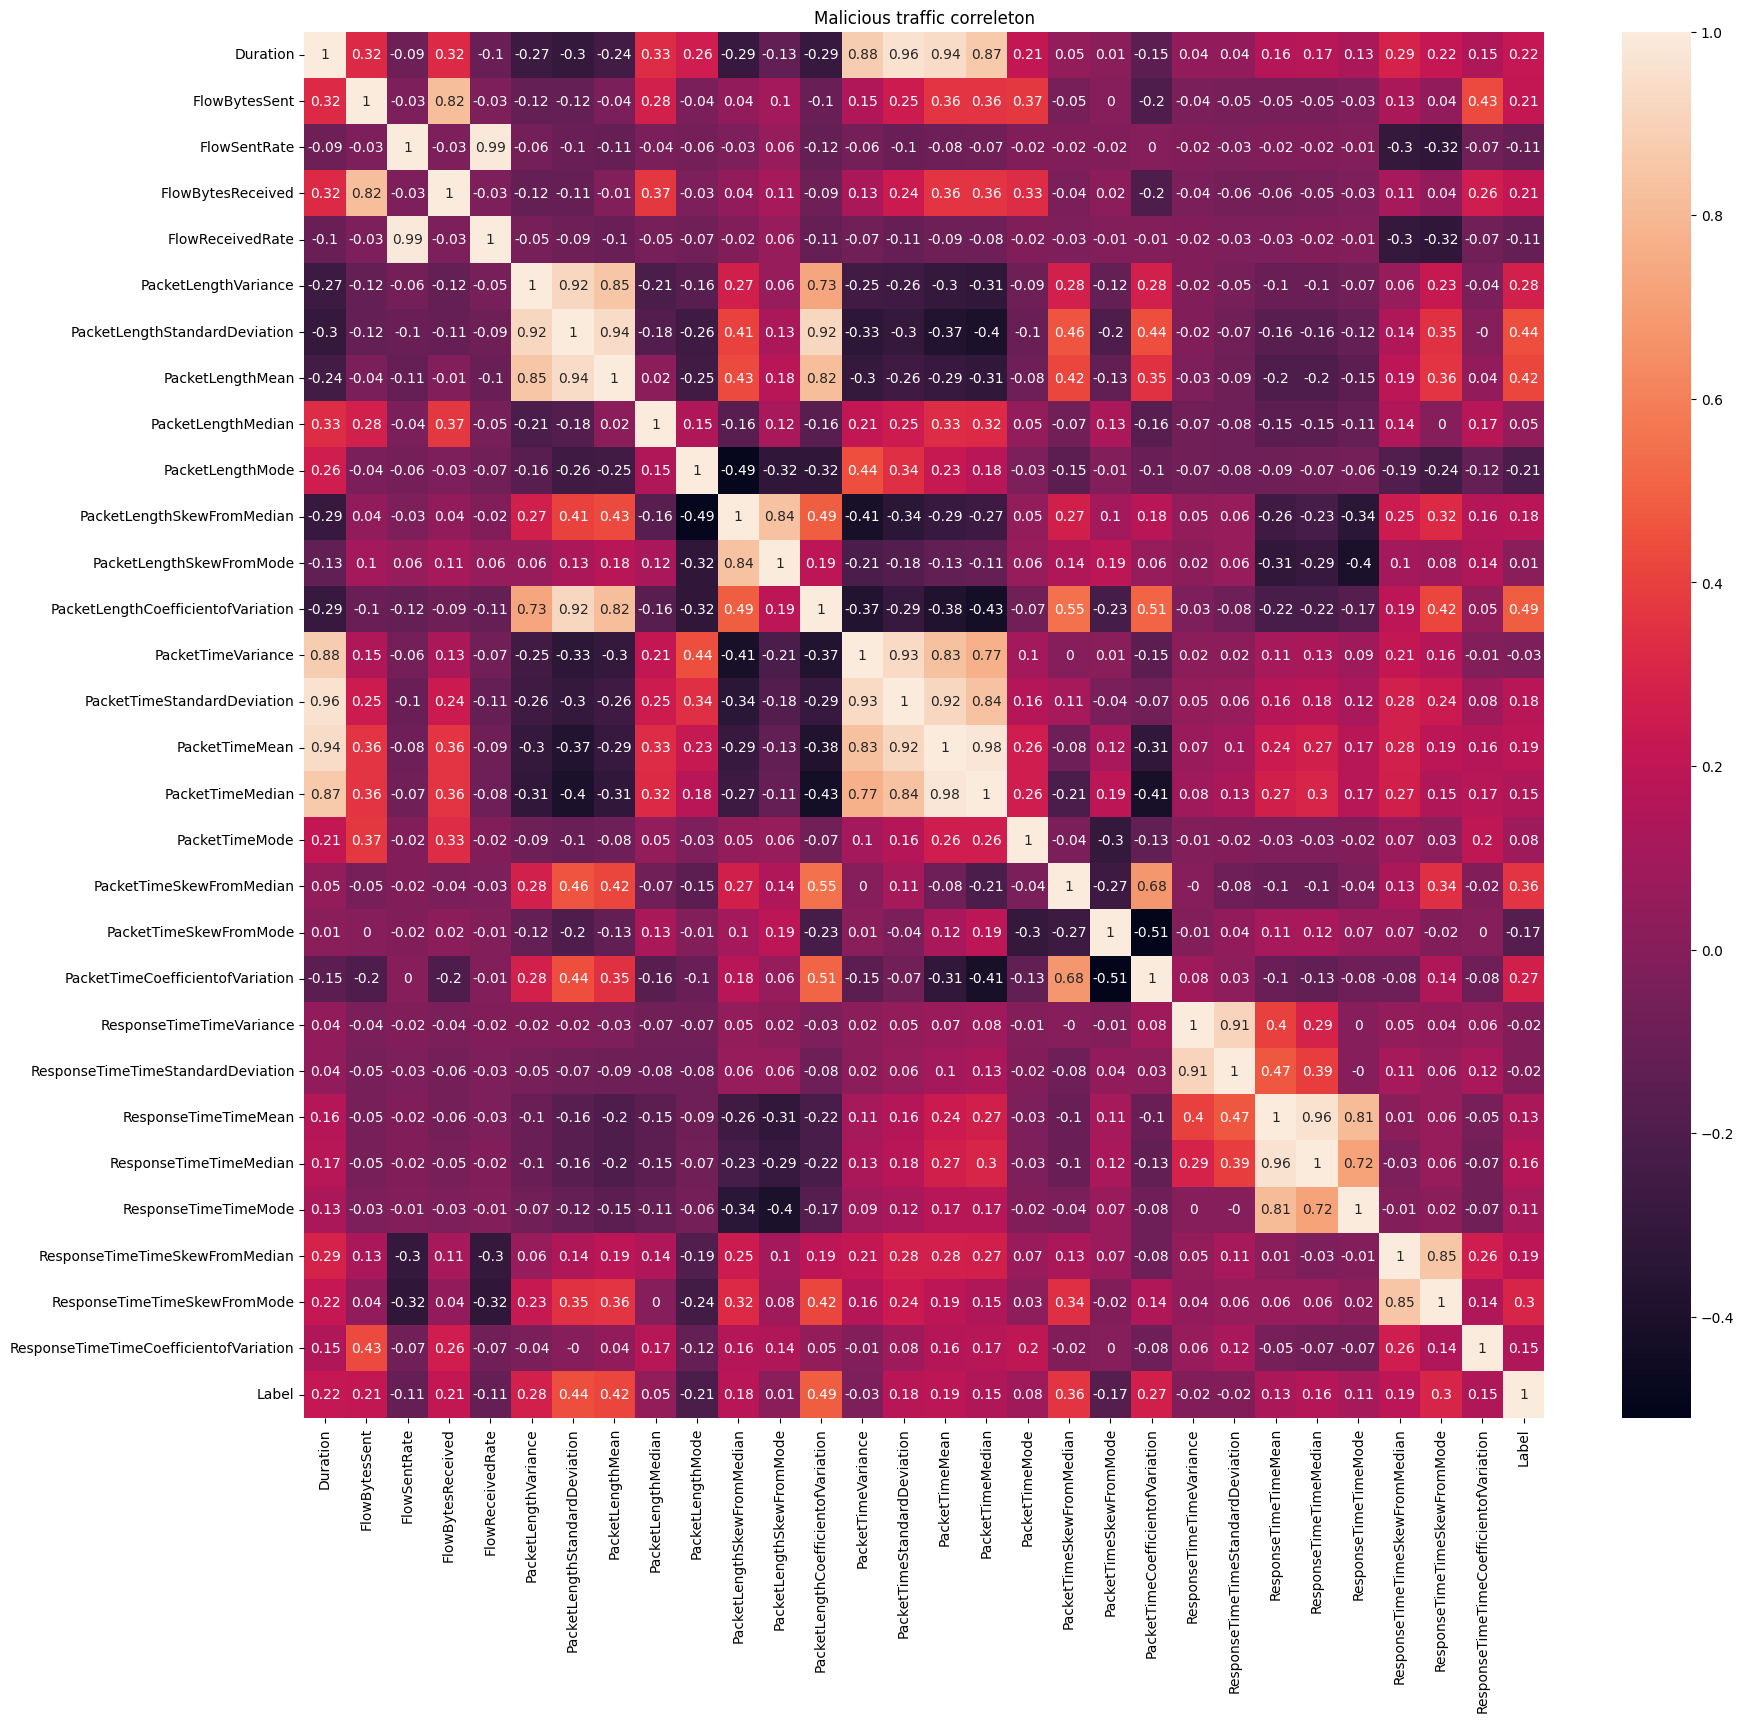

In [15]:
hep = dataframe_prep #.loc[dataframe_prep.Label=='Benign'].drop('Label',axis=1)

corr_mat_hep = hep.corr().round(2)

plt.figure(figsize=(20,18))
plot = sns.heatmap(hep.corr().round(2), annot= True)
plot.set_title("Malicious traffic correleton")

## Zły ruch

Text(0.5, 1.0, 'Malicious')

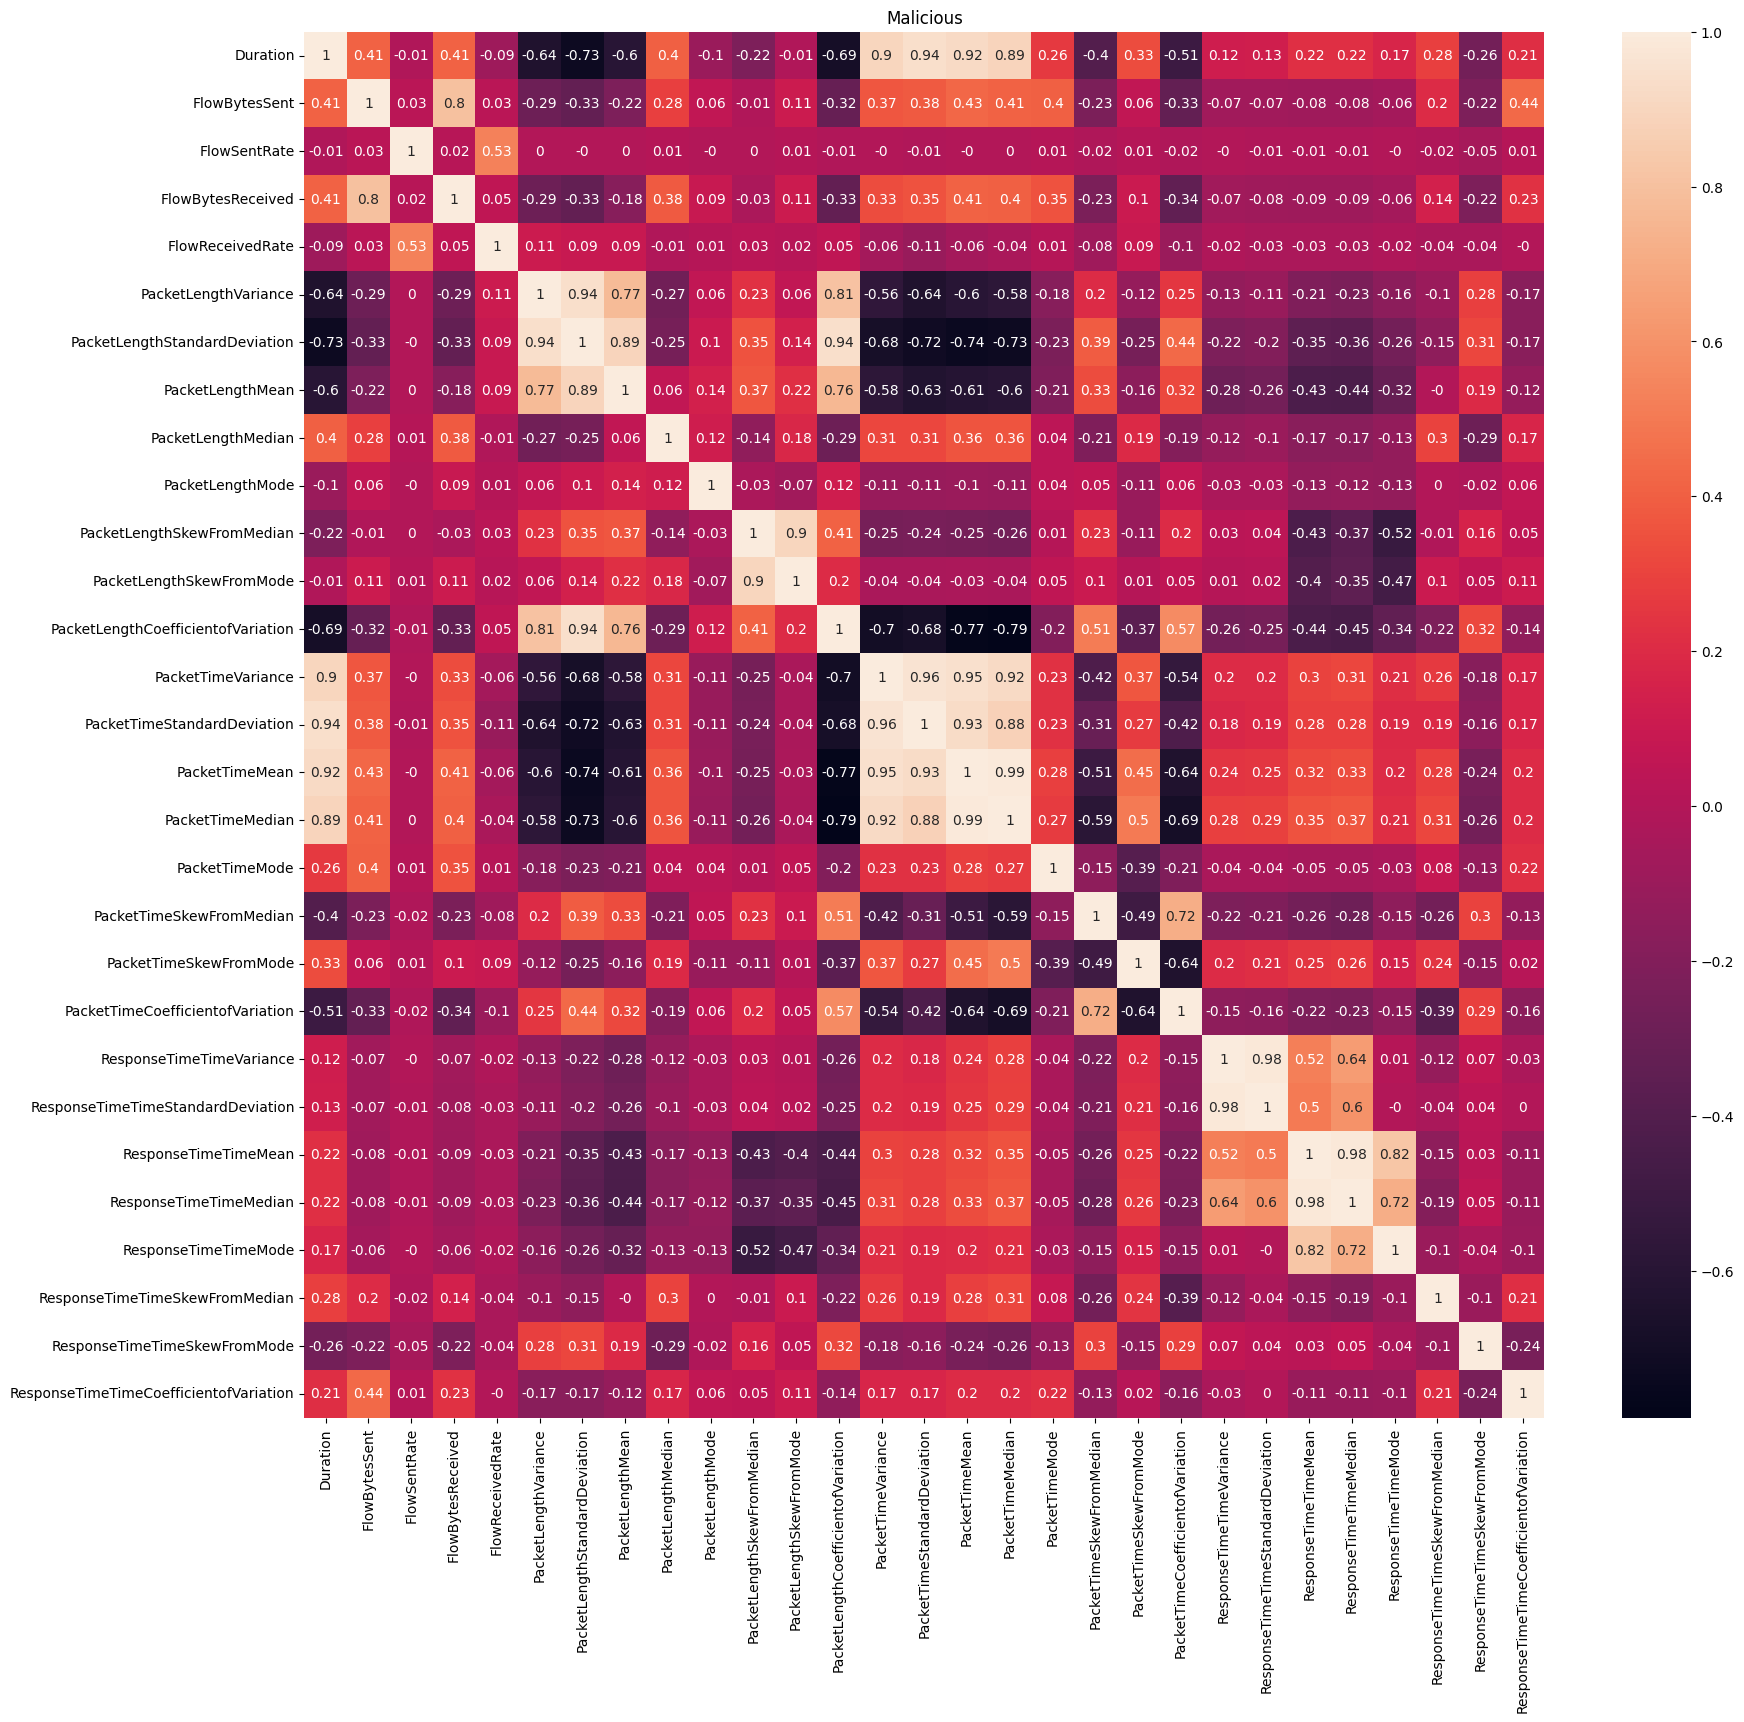

In [16]:
hep = dataframe_prep.loc[dataframe_prep.Label==1].drop('Label',axis=1)

corr_mat_hep = hep.corr().round(2)

plt.figure(figsize=(20,18))
plot = sns.heatmap(hep.corr().round(2), annot= True)
plot.set_title("Malicious")

# Wykres rozrzutu po oversampling'u SMOTE

Relacja między czasem trwania, a długością pakietu

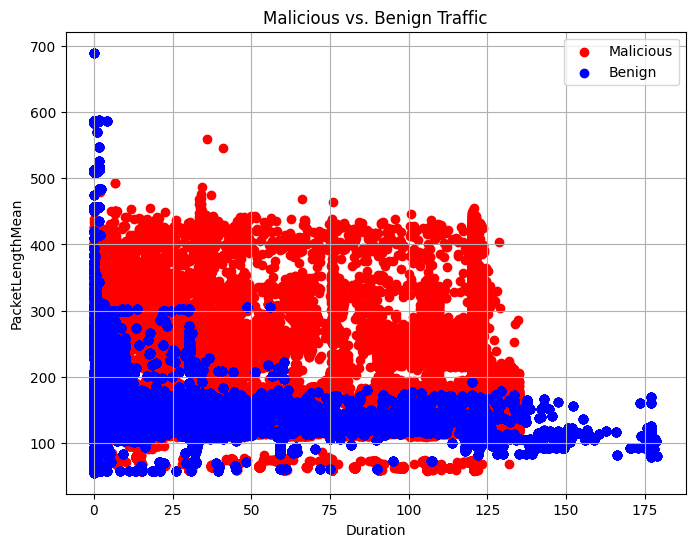

In [17]:
malicious_data = dataframe[dataframe['Label'] == 'Malicious']
benign_data = dataframe[dataframe['Label'] == 'Benign']

# Plotting
plt.figure(figsize=(8, 6))

# Scatter plot for malicious traffic
plt.scatter(malicious_data['Duration'], malicious_data['PacketLengthMean'], color='red', label='Malicious')

# Scatter plot for benign traffic
plt.scatter(benign_data['Duration'], benign_data['PacketLengthMean'], color='blue', label='Benign')

# Set labels and title
plt.xlabel('Duration')
plt.ylabel('PacketLengthMean')
plt.title('Malicious vs. Benign Traffic')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

Relacja między bajtami otrzymanymi, wysłanymi

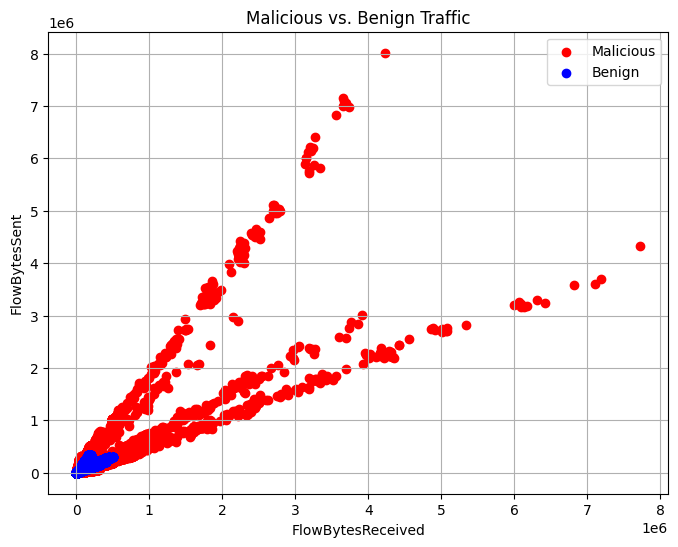

In [18]:
malicious_data = dataframe[dataframe['Label'] == 'Malicious']
benign_data = dataframe[dataframe['Label'] == 'Benign']

# Plotting
plt.figure(figsize=(8, 6))

# Scatter plot for malicious traffic
plt.scatter(malicious_data['FlowBytesReceived'], malicious_data['FlowBytesSent'], color='red', label='Malicious')

# Scatter plot for benign traffic
plt.scatter(benign_data['FlowBytesReceived'], benign_data['FlowBytesSent'], color='blue', label='Benign')

# Set labels and title
plt.xlabel('FlowBytesReceived')
plt.ylabel('FlowBytesSent')
plt.title('Malicious vs. Benign Traffic')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

## *Dane testowe i treningowe*

In [19]:
# Features
X = dataframe_prep.drop(columns=["Label"])

# Target variable
y = dataframe_prep['Label']

In [20]:
from sklearn.model_selection import train_test_split # Import train_test_split function

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [21]:
X_train.shape
y_train.shape
print("train rows: {}, test rows: {}".format(X_train.shape[0], X_test.shape[0]))

train rows: 349770, test rows: 149902


# Mieszanie rekordów

In [22]:
from pandas.core.common import random_state
shuffled_df = dataframe_prep.sample(frac=1,random_state=4)

Benign_df = shuffled_df.loc[shuffled_df['Label'] == 0]
shuffled_df.shape
Malicious_df = shuffled_df.loc[shuffled_df['Label'] == 1].sample(n=20000, random_state=42)

normalized_df = pd.concat([Benign_df, Malicious_df])

# Klasyfikatory

In [24]:
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import make_pipeline

models = []

ETC = ExtraTreesClassifier()
RFC = RandomForestClassifier()
DTC = DecisionTreeClassifier()
KNC = KNeighborsClassifier()
MLP = MLPClassifier()
LR = LinearRegression()
# SS_LR = make_pipeline(StandardScaler(), LR)

models.append(('ETC', ExtraTreesClassifier()))
models.append(('RFC', RFC))
models.append(('DTC', DTC))
models.append(('KNC', KNeighborsClassifier()))
models.append(('MLP', MLP))
models.append(('LR', LR))
#models.append(('SS_LR', SS_LR))

Model = StackingClassifier(estimators=models, )
print(models)

[('ETC', ExtraTreesClassifier()), ('RFC', RandomForestClassifier()), ('DTC', DecisionTreeClassifier()), ('KNC', KNeighborsClassifier()), ('MLP', MLPClassifier()), ('LR', LinearRegression())]


In [25]:
from numpy.random import seed
from sklearn import model_selection
results = []
names = []
times = []

for name, model in models:
        kfold = model_selection.KFold(n_splits=5, shuffle = True)
        start_time = time.time()
        cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold)
        end_time = time.time()



        print(cv_results)
        results.append(cv_results)
        names.append(name)
        times.append(end_time - start_time)

        msg = "%s Accuracy: %f (+/- %f), Time: %f seconds," % (name, cv_results.mean(), cv_results.std(), end_time - start_time)
        print(msg)

KeyboardInterrupt: 

# Klasyfikator - Decision Tree



In [60]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

start_time = time.time()
dt.fit(X_train,y_train)
elapsed_time = time.time() - start_time
print("Training time: {}".format(elapsed_time))

y_pred = dt.predict(X_test)

# Get feature importances
feature_importances = dt.feature_importances_

# Find the index of the most important feature
most_important_index = feature_importances.argmax()



print("Accuracy:", dt.score(X_test, y_test))



Training time: 10.20797610282898
Accuracy: 0.9999399607743726


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[75035,     0],
       [   12, 74855]])

In [ ]:
tp, fn, fp, tn = confusion_matrix(y_test, y_pred).ravel()
(tp, fn, fp, tn)

(75035, 0, 12, 74855)

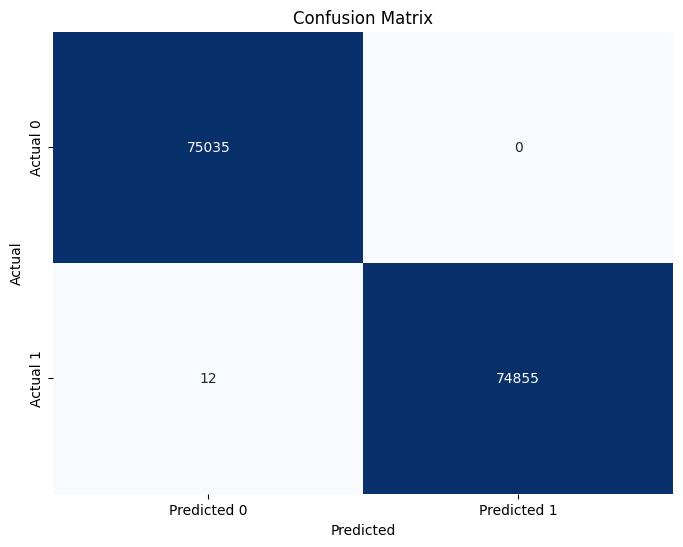

In [ ]:
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
sensitivity = tp/(tp+fn)
specificity = tn/(fp+tn)
positivity= tp/(tp+fp)

print("sensitivity = {:.4f}, specificity = {:.4f}, positivity = {:.4f}".format(sensitivity, specificity, positivity))

sensitivity = 1.0000, specificity = 0.9998, positivity = 0.9998


# Klasyfikator - Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
start_time = time.time()
rf.fit(X_train,y_train)
elapsed_time = time.time() - start_time
print("Training time: {}".format(elapsed_time))

y_pred = dt.predict(X_test)

print("Accuracy:", rf.score(X_test, y_test))

Training time: 152.41101241111755
Accuracy: 0.999953302824512


In [ ]:
confusion_matrix(y_test, y_pred)

array([[75035,     0],
       [   12, 74855]])

In [ ]:
tp, fn, fp, tn = confusion_matrix(y_test, y_pred).ravel()
(tp, fn, fp, tn)

(75035, 0, 12, 74855)

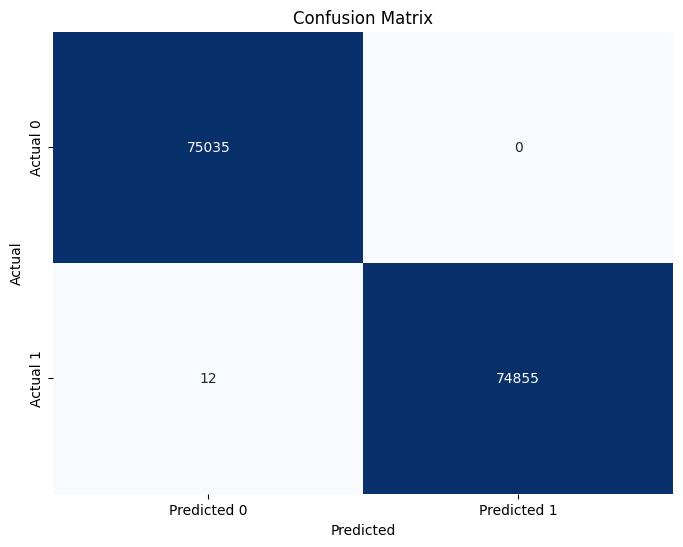

In [ ]:
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
sensitivity = tp/(tp+fn)
specificity = tn/(fp+tn)
positivity= tp/(tp+fp)

print("sensitivity = {:.4f}, specificity = {:.4f}, positivity = {:.4f}".format(sensitivity, specificity, positivity))

sensitivity = 1.0000, specificity = 0.9998, positivity = 0.9998


# KNeighborsClassifier

In [ ]:

kn = KNeighborsClassifier(n_neighbors=10)
start_time = time.time()
kn.fit(X_train,y_train)
elapsed_time = time.time() - start_time
print("Training time: {}".format(elapsed_time))

y_pred = kn.predict(X_test)

print("Accuracy:", kn.score(X_test, y_test))

Training time: 0.11565542221069336
Accuracy: 0.9916612186628597


In [ ]:
confusion_matrix(y_test, y_pred)

array([[74930,   105],
       [ 1145, 73722]])

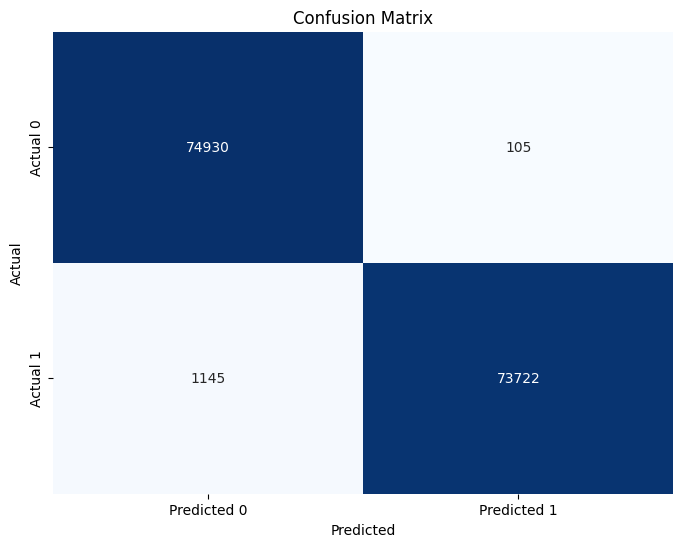

In [ ]:
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
tp, fn, fp, tn = confusion_matrix(y_test, y_pred).ravel()
(tp, fn, fp, tn)

(74930, 105, 1145, 73722)

In [ ]:
sensitivity = tp/(tp+fn)
specificity = tn/(fp+tn)
positivity= tp/(tp+fp)

print("sensitivity = {:.4f}, specificity = {:.4f}, positivity = {:.4f}".format(sensitivity, specificity, positivity))

sensitivity = 0.9986, specificity = 0.9847, positivity = 0.9849


# Extra Trees

In [ ]:
et = ExtraTreesClassifier()
start_time = time.time()
et.fit(X_train,y_train)
elapsed_time = time.time() - start_time
print("Training time: {}".format(elapsed_time))

y_pred = et.predict(X_test)

print("Accuracy:", et.score(X_test, y_test))

Training time: 38.44768476486206
Accuracy: 0.9999466317994423


In [ ]:
confusion_matrix(y_test, y_pred)

array([[75035,     0],
       [    8, 74859]])

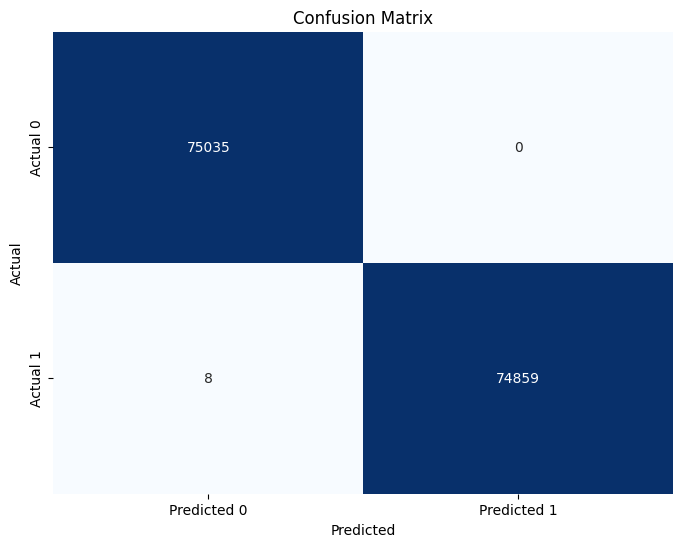

In [ ]:
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
tp, fn, fp, tn = confusion_matrix(y_test, y_pred).ravel()
(tp, fn, fp, tn)

(75035, 0, 8, 74859)

In [ ]:
sensitivity = tp/(tp+fn)
specificity = tn/(fp+tn)
positivity= tp/(tp+fp)

print("sensitivity = {:.4f}, specificity = {:.4f}, positivity = {:.4f}".format(sensitivity, specificity, positivity))

sensitivity = 1.0000, specificity = 0.9999, positivity = 0.9999



# MLP


In [ ]:
mlp = MLPClassifier()
start_time = time.time()
mlp.fit(X_train,y_train)
elapsed_time = time.time() - start_time
print("Training time: {}".format(elapsed_time))

y_pred = mlp.predict(X_test)

print("Accuracy:", mlp.score(X_test, y_test))

Training time: 428.0889675617218
Accuracy: 0.900441621859615


In [ ]:
confusion_matrix(y_test, y_pred)

<class 'sklearn.neural_network._multilayer_perceptron.MLPClassifier'> <class 'sklearn.pipeline.Pipeline'>


In [ ]:
tp, fn, fp, tn = confusion_matrix(y_test, y_pred).ravel()
(tp, fn, fp, tn)

(60755, 14280, 644, 74223)

In [ ]:
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
sensitivity = tp/(tp+fn)
specificity = tn/(fp+tn)

print("sensitivity = {:.4f}, specificity = {:.4f}".format(sensitivity, specificity))

sensitivity = 0.8097, specificity = 0.9914


# Regresja liniowa

In [42]:
rl = LR
start_time = time.time()
rl.fit(X_train,y_train)
elapsed_time = time.time() - start_time
print("Training time: {}".format(elapsed_time))
# threshold = 0.5
# # Binarize the target variable
# y_train = np.where(y_train > threshold, 1, 0)
# y_test = np.where(y_test > threshold, 1, 0)

y_pred = rl.predict(X_test)
threshold = 0.5
y_pred = np.where(y_pred > threshold, 1, 0)
print("Accuracy:", rl.score(X_test, y_test))

Training time: 1.4443082809448242
Accuracy: 0.652938544508291


In [43]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[63537, 11498],
       [ 3220, 71647]])

In [44]:
tp, fn, fp, tn = confusion_matrix(y_test, y_pred).ravel()
(tp, fn, fp, tn)

(63537, 11498, 3220, 71647)

In [50]:
from sklearn.metrics import precision_score, recall_score, f1_score
sensitivity = tp/(tp+fn)
specificity = tn/(fp+tn)
f1 = f1_score(y_test, y_pred)
print(f1)
print("sensitivity = {:.4f}, specificity = {:.4f}".format(sensitivity, specificity))

0.9068551755562869
sensitivity = 0.8468, specificity = 0.9570


# UMAP

In [ ]:
#!pip install umap
#!pip install umap.plot
!pip install umap-learn


import umap

import numpy as np
mapper = umap.UMAP(verbose=True, n_neighbors=15, n_epochs=10).fit(dataframe_prep)
umap.plot.output_notebook()
p = umap.plot.interactive(
mapper, labels=y,
hover_data={"text": test_x, "label": test_y}, point_size=2,
background="black")
umap.plot.show(p)
3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 6.1 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=9609f00b93ebe93c1a92e1d192509b66d506ddb7970afdd7e06496d6dab88331
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn
UMAP(n_epochs=10, verbose=True)
Wed Jan 24 08:35:08 2024 Construct fuzzy simplicial set
Wed Jan 24 08:35:08 2024 Finding Nearest Neighbors
Wed Jan 24 08:35:08 2024 Building RP forest with 40 trees
Wed Jan 24 08:35:38 2024 NN descent for 19 iterations
	 1  /  19
	 2  /  19
	Stopping threshold met -- exiting after 2 iterations
Wed Jan 24 08:36:30 2024 Finished Nearest Neighbor Search
Wed Jan 24 08:36:38 2024 Construct embedding


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


[tekst linku](https://)# Redukcja wymiaru - PCA

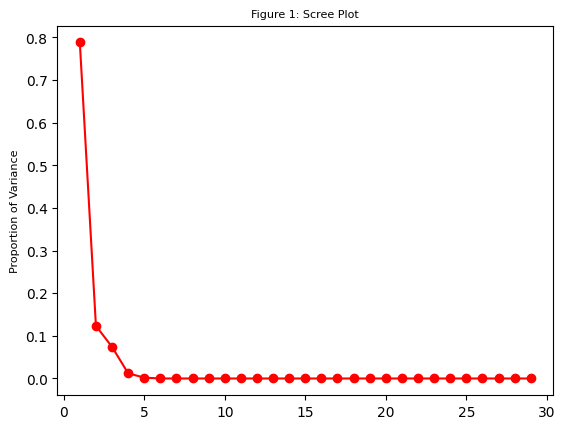

In [ ]:
pca_dataframe = dataframe.drop('Label', axis = 1)
pca = PCA(n_components = 29)
pca.fit(pca_dataframe)

prop_var = pca.explained_variance_ratio_


eigenvalues = pca.explained_variance_

PC_numbers = np.arange(pca.n_components_) + 1

plt.plot(PC_numbers, prop_var, 'ro-')
plt.title('Figure 1: Scree Plot', fontsize=8)
plt.ylabel('Proportion of Variance', fontsize=8)
plt.show()

## Optymalizacja parametrów

In [ ]:
hep = dataframe_prep.drop(['FlowSentRate', 'FlowBytesReceived', 'PacketLengthMean', 'PacketLengthMedian', 'Duration', 'FlowReceivedRate', 'PacketTimeMedian', 'PacketTimeSkewFromMode', 'PacketTimeMode', 'PacketTimeVariance', 'ResponseTimeTimeMode', 'ResponseTimeTimeMedian', 'ResponseTimeTimeVariance', 'PacketTimeMean', 'PacketLengthStandardDeviation', 'PacketTimeStandardDeviation', 'ResponseTimeTimeStandardDeviation', 'ResponseTimeTimeMean','ResponseTimeTimeSkewFromMedian', 'PacketTimeCoefficientofVariation', 'ResponseTimeTimeCoefficientofVariation','PacketLengthVariance', 'PacketLengthSkewFromMedian','PacketLengthSkewFromMode', 'PacketLengthMode'],axis=1)

corr_mat_hep = hep.corr().round(2)

plt.figure(figsize=(10,9))
plot = sns.heatmap(hep.corr().round(2), annot= True)
plot.set_title("Malicious traffic correleton")

## *Dane Testowe i Treningowe*

In [ ]:
# Features
X = dataframe_prep.drop(columns=["Label"])

y = dataframe_prep['Label']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

X_train.shape
y_train.shape
print("train rows: {}, test rows: {}".format(X_train.shape[0], X_test.shape[0]))

train rows: 349770, test rows: 149902


##Mieszanie Rekordów

In [ ]:
from pandas.core.common import random_state
shuffled_df = dataframe_prep.sample(frac=1,random_state=4)

Benign_df = shuffled_df.loc[shuffled_df['Label'] == 0]
shuffled_df.shape
Malicious_df = shuffled_df.loc[shuffled_df['Label'] == 1].sample(n=20000, random_state=42)

normalized_df = pd.concat([Benign_df, Malicious_df])